# Test For First Version Of `pydrift` 

We're going to test how it works with the famous titanic dataset

# Dependencies

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

from pydrift.core.drift_checker import ModelDriftChecker
from pydrift.constants import PATH_DATA, RANDOM_STATE
from pydrift.models import cat_features_fillna

# Read Data 

In [2]:
df_titanic = pd.read_csv('../datasets/titanic.csv')

# Constants 

In [3]:
TARGET = 'Survived'

# Model Training 

In [4]:
X = df_titanic.drop(columns=['PassengerId', TARGET])
y = df_titanic[TARGET]

cat_features = (X
                .select_dtypes(include=['category', 'object'])
                .columns)

X_filled = cat_features_fillna(X, cat_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_filled, y, test_size=.5, random_state=RANDOM_STATE, stratify=y
)

ml_classifier_model = CatBoostClassifier(
    num_trees=5,
    max_depth=3,
    cat_features=cat_features,
    random_state=RANDOM_STATE,
    verbose=False
)

ml_classifier_model.fit(X_train, y_train);

# Instanciate `pydrift.DataDriftChecker` 

In [5]:
df_left_data = pd.concat([X_train, y_train], axis=1)
df_right_data = pd.concat([X_test, y_test], axis=1)
    
model_drift_checker_ok = ModelDriftChecker(
    df_left_data, df_right_data, ml_classifier_model, target_column_name=TARGET
)

# Test  `ml_model_can_discriminate` Feature

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


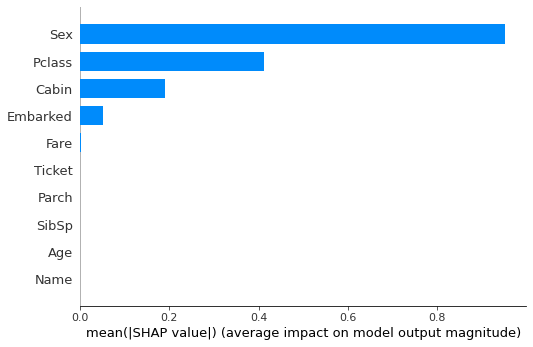

No drift found in your model

AUC left data: 0.8429909932983308
AUC right data: 0.8432429558745349


In [6]:
model_drift_checker_ok.check_model();

# Same But  Make It Drift

`pydrift` tells you that the problem is in `Sex` feature (as is obviously in this example)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


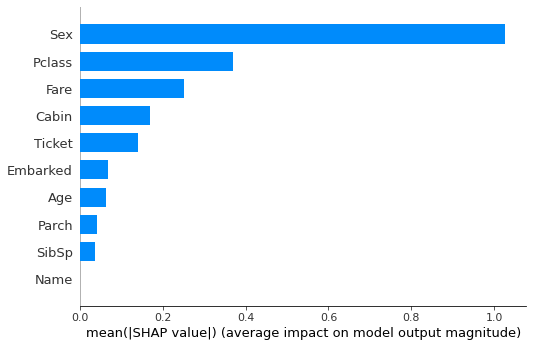

Drift found in your model, take a look on the most discriminative features (plots when minimal is set to False), DataDriftChecker can help you with changes in features distribution and also look at your hyperparameters

AUC left data: 0.9080548085542323
AUC right data: 0.8590430622009568


In [7]:
ml_classifier_model_drifted = CatBoostClassifier(
    num_trees=10,
    max_depth=6,
    cat_features=cat_features,
    random_state=RANDOM_STATE,
    verbose=False
)

ml_classifier_model_drifted.fit(X_train, y_train)

model_drift_checker_ko = ModelDriftChecker(
    df_left_data, df_right_data, ml_classifier_model_drifted, target_column_name=TARGET
)

model_drift_checker_ko.check_model();